In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import classification_report, accuracy_score


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("abalone.data")
df.head()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [3]:
cols = ["Sex","Length","Diameter","Height","WholeWeight","ShuckedWeight","VisceraWeight","ShellWeight","Rings"]

In [4]:
df = pd.read_csv("abalone.data", header=None, names = cols)
df.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sex            4177 non-null   object 
 1   Length         4177 non-null   float64
 2   Diameter       4177 non-null   float64
 3   Height         4177 non-null   float64
 4   WholeWeight    4177 non-null   float64
 5   ShuckedWeight  4177 non-null   float64
 6   VisceraWeight  4177 non-null   float64
 7   ShellWeight    4177 non-null   float64
 8   Rings          4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


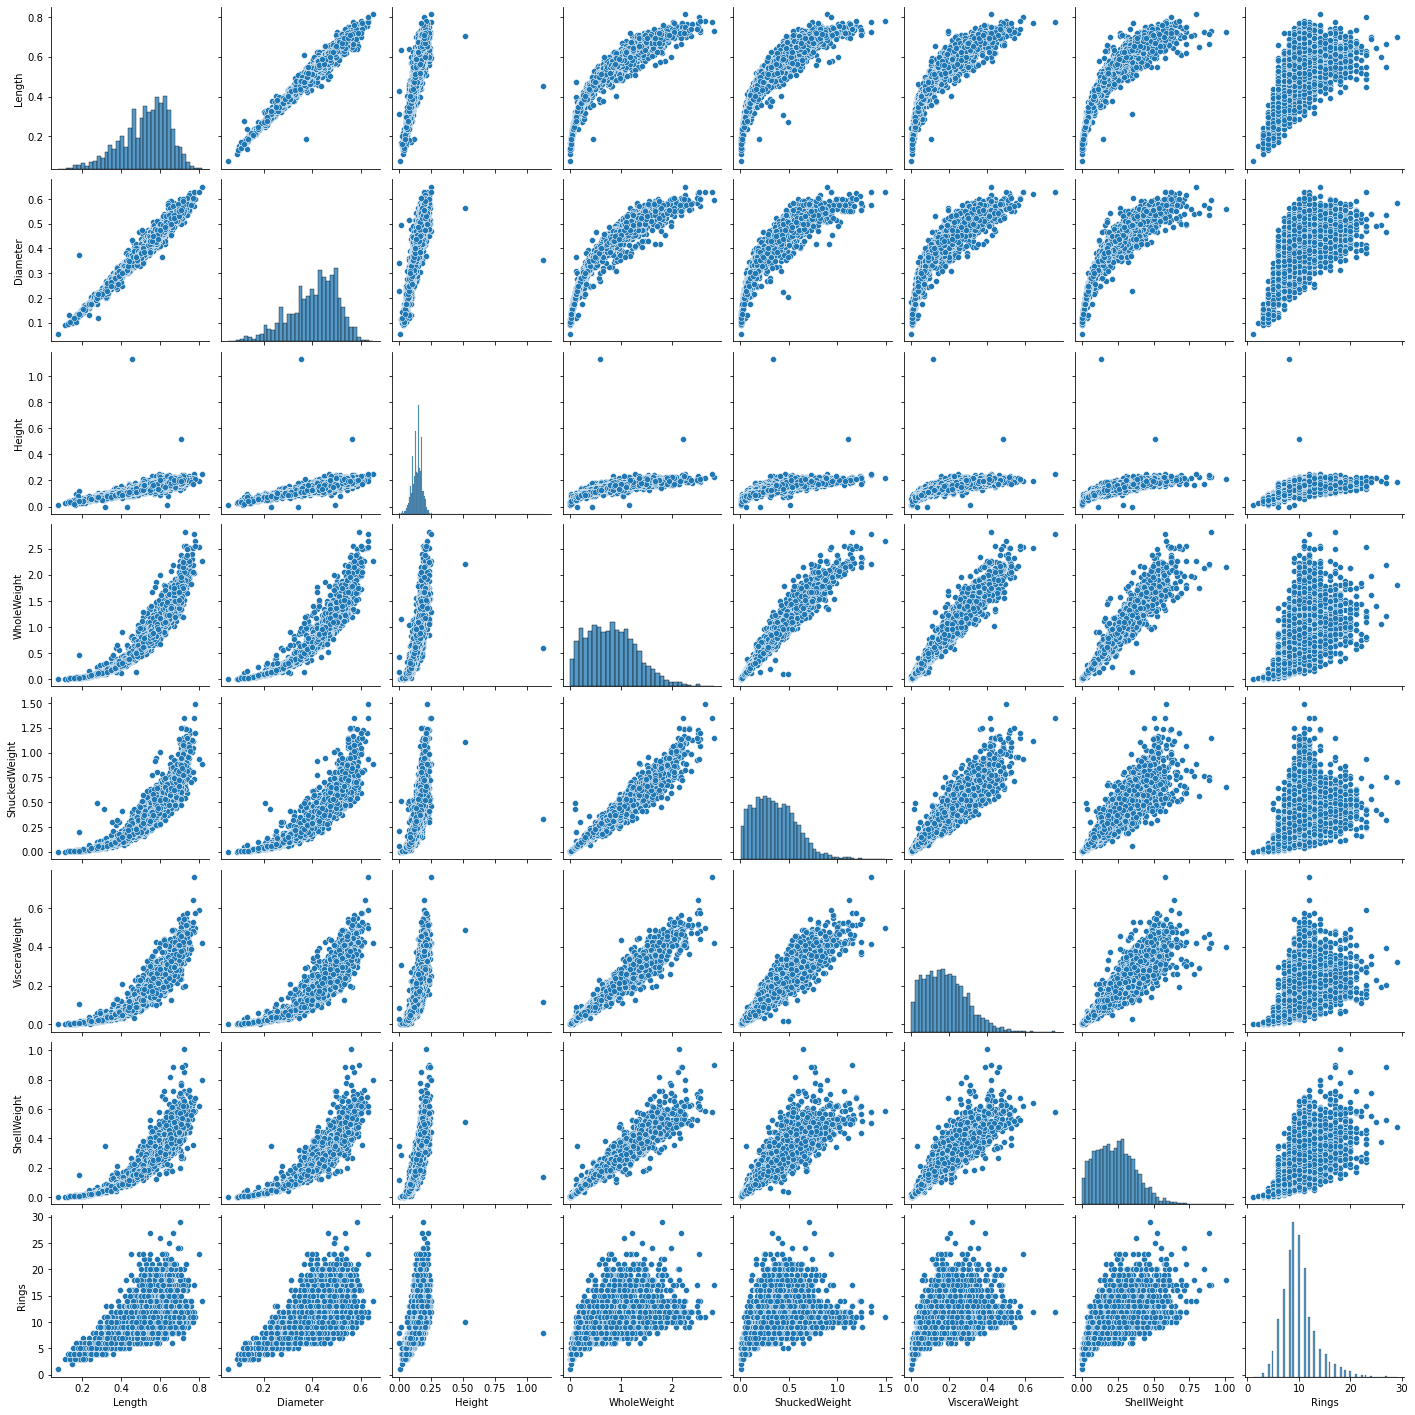

In [6]:
sns.pairplot(df)

In [7]:
x = df.iloc[:,1:].values
x

array([[ 0.455 ,  0.365 ,  0.095 , ...,  0.101 ,  0.15  , 15.    ],
       [ 0.35  ,  0.265 ,  0.09  , ...,  0.0485,  0.07  ,  7.    ],
       [ 0.53  ,  0.42  ,  0.135 , ...,  0.1415,  0.21  ,  9.    ],
       ...,
       [ 0.6   ,  0.475 ,  0.205 , ...,  0.2875,  0.308 ,  9.    ],
       [ 0.625 ,  0.485 ,  0.15  , ...,  0.261 ,  0.296 , 10.    ],
       [ 0.71  ,  0.555 ,  0.195 , ...,  0.3765,  0.495 , 12.    ]])

In [8]:
from sklearn.cluster import KMeans

In [9]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=1)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [10]:
wcss

[44860.378975952,
 18861.998927978846,
 9889.828962494752,
 6340.081927459619,
 4384.82991662735,
 3438.389737637842,
 2706.8677666982144,
 2331.3658828700895,
 2021.483195630447,
 1717.8814779488623]

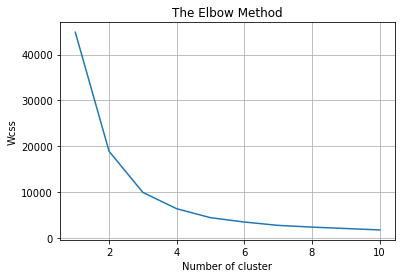

In [11]:
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of cluster")
plt.ylabel("Wcss")
plt.grid(True)
plt.show()

In [12]:
kmeans = KMeans(n_clusters=3, random_state=1)
ykmeans = kmeans.fit_predict(x)

In [13]:
ykmeans

array([1, 2, 0, ..., 0, 0, 0])

In [14]:
kmeans.cluster_centers_

array([[ 0.57364035,  0.44874342,  0.15363377,  1.00693048,  0.44330066,
         0.22172434,  0.28465482, 10.4127193 ],
       [ 0.58873469,  0.46642857,  0.16835714,  1.13776327,  0.4316051 ,
         0.23970306,  0.36281939, 16.46122449],
       [ 0.42099147,  0.32127576,  0.10659559,  0.4323742 ,  0.198199  ,
         0.09335714,  0.12139446,  6.88415068]])

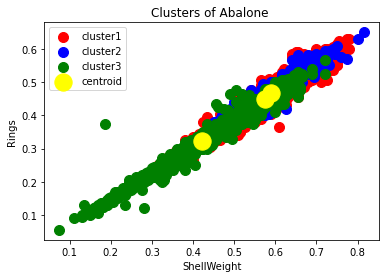

In [15]:
plt.scatter(x[ykmeans==0,0], x[ykmeans==0,1], s=100, c="red", label="cluster1")
plt.scatter(x[ykmeans==1,0], x[ykmeans==1,1], s=100, c="blue", label="cluster2")
plt.scatter(x[ykmeans==2,0], x[ykmeans==2,1], s=100, c="green", label="cluster3")

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c="yellow", label="centroid")

plt.title("Clusters of Abalone ")
plt.xlabel("ShellWeight")
plt.ylabel("Rings")
plt.legend()
plt.show()

In [16]:
df["Target"]= ykmeans

In [17]:
df.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Target
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,2
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,2


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sex            4177 non-null   object 
 1   Length         4177 non-null   float64
 2   Diameter       4177 non-null   float64
 3   Height         4177 non-null   float64
 4   WholeWeight    4177 non-null   float64
 5   ShuckedWeight  4177 non-null   float64
 6   VisceraWeight  4177 non-null   float64
 7   ShellWeight    4177 non-null   float64
 8   Rings          4177 non-null   int64  
 9   Target         4177 non-null   int32  
dtypes: float64(7), int32(1), int64(1), object(1)
memory usage: 310.1+ KB


In [19]:
df.isna().sum()

Sex              0
Length           0
Diameter         0
Height           0
WholeWeight      0
ShuckedWeight    0
VisceraWeight    0
ShellWeight      0
Rings            0
Target           0
dtype: int64

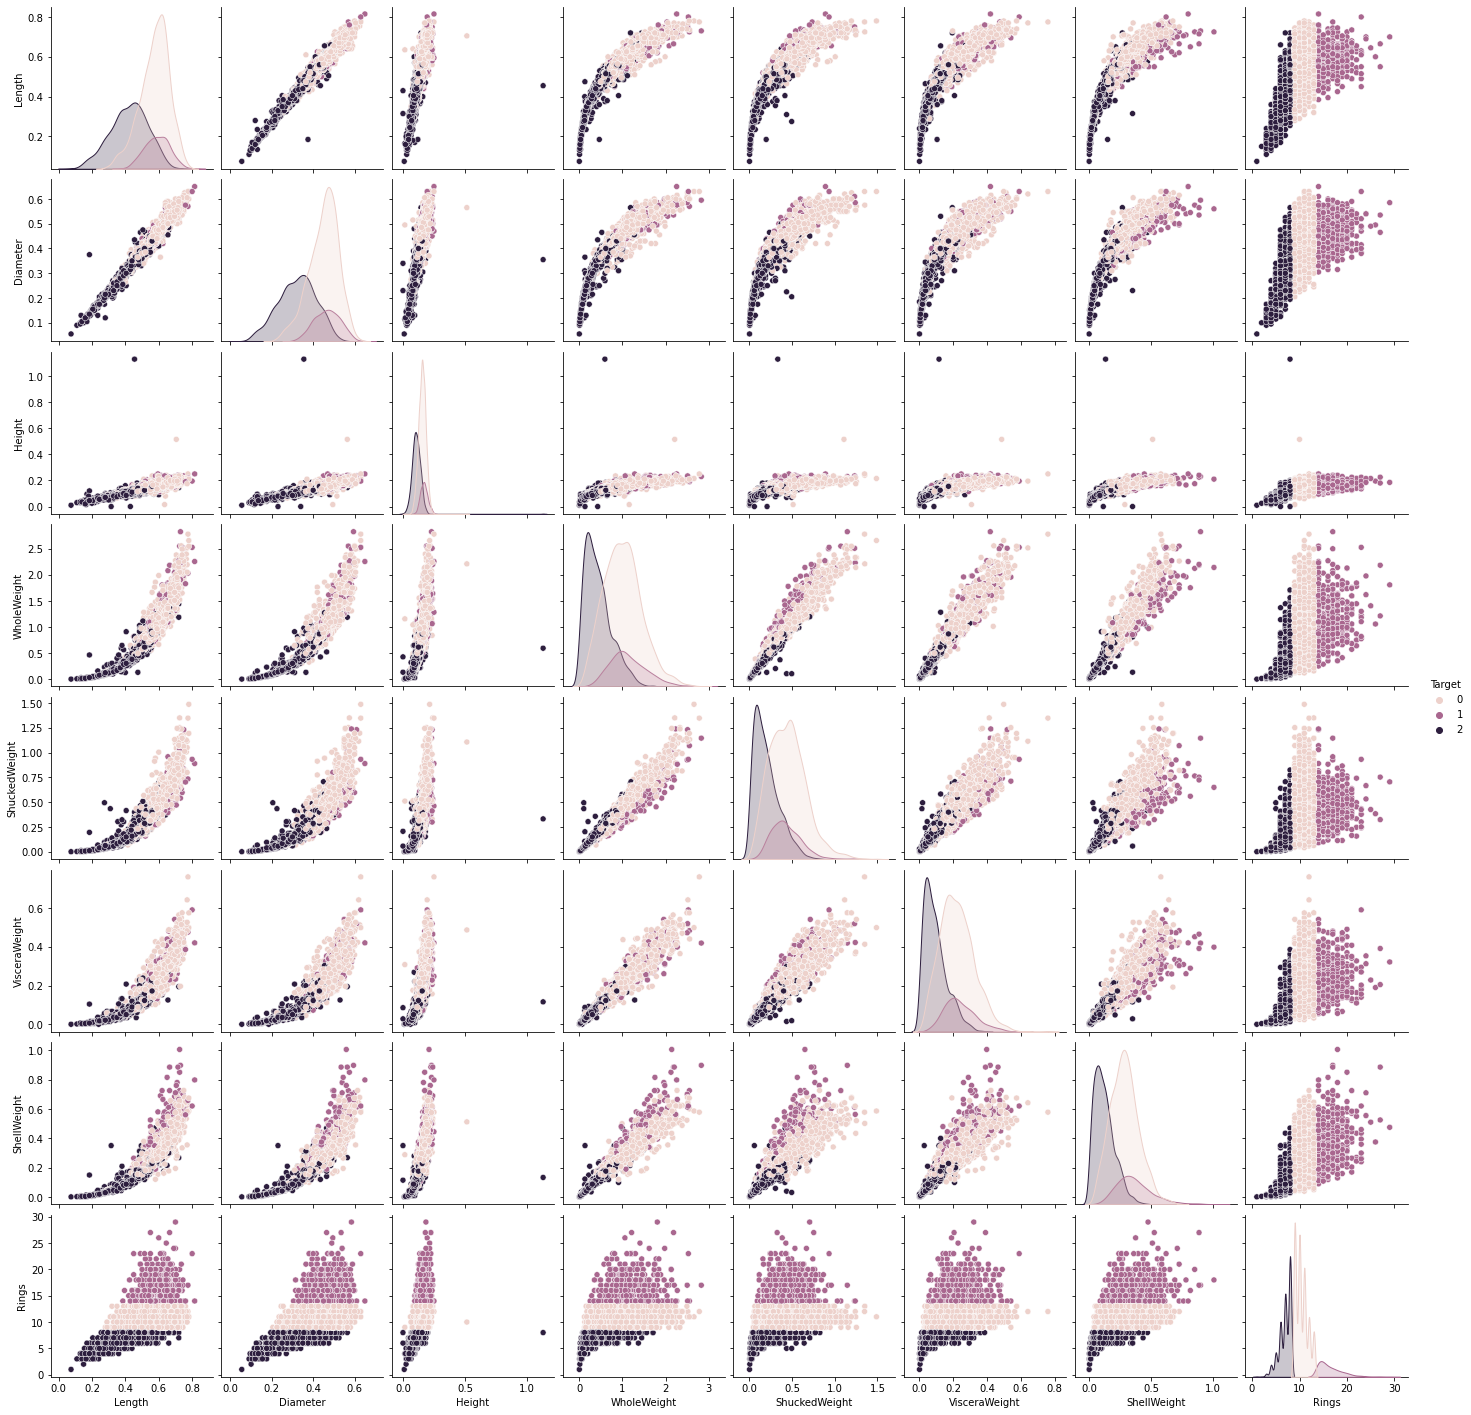

In [20]:
sns.pairplot(df, hue="Target")

In [21]:
x = df.iloc[:,1:].values
y = df.iloc[:, -1].values

In [22]:
x

array([[ 0.455,  0.365,  0.095, ...,  0.15 , 15.   ,  1.   ],
       [ 0.35 ,  0.265,  0.09 , ...,  0.07 ,  7.   ,  2.   ],
       [ 0.53 ,  0.42 ,  0.135, ...,  0.21 ,  9.   ,  0.   ],
       ...,
       [ 0.6  ,  0.475,  0.205, ...,  0.308,  9.   ,  0.   ],
       [ 0.625,  0.485,  0.15 , ...,  0.296, 10.   ,  0.   ],
       [ 0.71 ,  0.555,  0.195, ...,  0.495, 12.   ,  0.   ]])

In [23]:
y

array([1, 2, 0, ..., 0, 0, 0])

In [24]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y, test_size=0.3, random_state=1, stratify = y)

In [25]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    print(classification_report(ytest,ypred))

In [26]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
svm = SVC()
rf = RandomForestClassifier()

In [27]:
models = []
models.append(("KNN     -:", KNeighborsClassifier()))
models.append(("Logreg  -:", LogisticRegression()))
models.append(("SVM     -:", SVC()))
models.append(("DT      -:", DecisionTreeClassifier()))
models.append(("RF      -:", RandomForestClassifier()))
models.append(("Ada     -:", AdaBoostClassifier(n_estimators=100)))
models.append(("gbc     -:", GradientBoostingClassifier(n_estimators=100)))
accuracy=[]

for name, model in models:
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    ac = accuracy_score(ytest, ypred)
    accuracy.append(round(ac*100))
    
    print(name)
    print(classification_report(ytest, ypred))
    print()


print(f"Avg. Ensemble Acurracy-: {np.array(accuracy).mean()} %")

KNN     -:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       685
           1       1.00      1.00      1.00       147
           2       1.00      1.00      1.00       422

    accuracy                           1.00      1254
   macro avg       1.00      1.00      1.00      1254
weighted avg       1.00      1.00      1.00      1254


Logreg  -:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       685
           1       1.00      1.00      1.00       147
           2       1.00      1.00      1.00       422

    accuracy                           1.00      1254
   macro avg       1.00      1.00      1.00      1254
weighted avg       1.00      1.00      1.00      1254


SVM     -:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       685
           1       1.00      1.00      1.00       147
           2       1.00      1.00      1

### Hyper Parameter Tuning

In [28]:
logregs = []

logregs.append(("LogregLin        :- ", LogisticRegression(solver = 'liblinear')))
logregs.append(("LogregLbf        :- ", LogisticRegression(solver = 'lbfgs')))
logregs.append(("LogregNcg        :- ", LogisticRegression(solver = 'newton-cg')))

for name, model in logregs:
    print(name)
    mymodel(model)
    print("\n\n\n")


LogregLin        :- 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       685
           1       1.00      1.00      1.00       147
           2       1.00      1.00      1.00       422

    accuracy                           1.00      1254
   macro avg       1.00      1.00      1.00      1254
weighted avg       1.00      1.00      1.00      1254





LogregLbf        :- 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       685
           1       1.00      1.00      1.00       147
           2       1.00      1.00      1.00       422

    accuracy                           1.00      1254
   macro avg       1.00      1.00      1.00      1254
weighted avg       1.00      1.00      1.00      1254





LogregNcg        :- 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       685
           1       1.00      1.00      1.00       147
    

In [29]:
mymodel(logreg)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       685
           1       1.00      1.00      1.00       147
           2       1.00      1.00      1.00       422

    accuracy                           1.00      1254
   macro avg       1.00      1.00      1.00      1254
weighted avg       1.00      1.00      1.00      1254



In [30]:
svms = []
svms.append(("SVMlin           :- ", SVC(kernel = 'linear')))
svms.append(("SVMpol          :- ", SVC(kernel = 'poly')))
svms.append(("SVMrbf           :- ", SVC(kernel = 'rbf')))

for name, model in svms:
    print(name)
    mymodel(model)
    print("\n\n\n")

SVMlin           :- 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       685
           1       1.00      1.00      1.00       147
           2       1.00      1.00      1.00       422

    accuracy                           1.00      1254
   macro avg       1.00      1.00      1.00      1254
weighted avg       1.00      1.00      1.00      1254





SVMpol          :- 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       685
           1       1.00      1.00      1.00       147
           2       1.00      1.00      1.00       422

    accuracy                           1.00      1254
   macro avg       1.00      1.00      1.00      1254
weighted avg       1.00      1.00      1.00      1254





SVMrbf           :- 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       685
           1       1.00      1.00      1.00       147
     

In [31]:
mymodel(svm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       685
           1       1.00      1.00      1.00       147
           2       1.00      1.00      1.00       422

    accuracy                           1.00      1254
   macro avg       1.00      1.00      1.00      1254
weighted avg       1.00      1.00      1.00      1254



### Cross Validation Score

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
for name, model in models:
    print(name)
    cvs = cross_val_score(model,x,y,cv=5,scoring='accuracy')
    print(cvs.mean())
    print("\n\n\n")

KNN     -:
1.0




Logreg  -:
1.0




SVM     -:
1.0




DT      -:
1.0




RF      -:
1.0




Ada     -:
1.0




gbc     -:
1.0






#### Results

- This model gives 100% accuracy.
- Some HyperParameterTuning has been done even though not necessary
- the mean accuracy of the model is also 100%